# 幸福感调查分析

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 数据处理及清洗

In [2]:
# 导入数据，解析survey_time列的值作为独立的日期列，指定字符集类型
train = pd.read_csv('happiness_train_complete.csv', parse_dates=['survey_time'], encoding='latin-1')
test = pd.read_csv('happiness_test_complete.csv', parse_dates=['survey_time'], encoding='latin-1')
train.head()

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,...,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
0,1,4,1,12,32,59,2015-08-04 14:18:00,1,1959,1,...,4,50,60,50,50,30.0,30,50,50,50
1,2,4,2,18,52,85,2015-07-21 15:04:00,1,1992,1,...,3,90,70,70,80,85.0,70,90,60,60
2,3,4,2,29,83,126,2015-07-21 13:24:00,2,1967,1,...,4,90,80,75,79,80.0,90,90,90,75
3,4,5,2,10,28,51,2015-07-25 17:33:00,2,1943,1,...,3,100,90,70,80,80.0,90,90,80,80
4,5,4,1,7,18,36,2015-08-10 09:50:00,2,1994,1,...,2,50,50,50,50,50.0,50,50,50,50


In [3]:
train.shape

(8000, 140)

In [4]:
o=set(train['happiness'])
print(o)

{1, 2, 3, 4, 5, -8}


In [5]:
# 处理异常值
# 将happiness中的‘-8’无法回答，改为‘3’说不上幸福不幸福
train['happiness'] = train['happiness'].replace(-8, 3)

In [6]:
# 检查是否有缺失值
def check_missing(df):
    miss = df.isnull().sum().any()
    if miss:
        total_miss = df.isnull().sum()
        percent = (df.isnull().sum())/(df.isnull().count()*100)
        output = pd.concat([total_miss, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        for col in df.columns:
            dType =str(df[col].dtype)
            data_type.append(dType)
        output['Types'] = data_type
        print(output[output['Total'] != 0])
        return np.transpose(output)
    else:
        return False
check_missing(train)

                 Total   Percent    Types
edu_other         7997  0.009996   object
edu_status        1120  0.001400  float64
edu_yr            1972  0.002465  float64
join_party        7176  0.008970  float64
property_other    7934  0.009917   object
hukou_loc            4  0.000005  float64
social_neighbor    796  0.000995  float64
social_friend      796  0.000995  float64
work_status       5049  0.006311  float64
work_yr           5049  0.006311  float64
work_type         5049  0.006311  float64
work_manage       5049  0.006311  float64
family_income        1  0.000001  float64
invest_other      7971  0.009964   object
minor_child       1066  0.001332  float64
marital_1st        828  0.001035  float64
s_birth           1718  0.002148  float64
marital_now       1770  0.002213  float64
s_edu             1718  0.002148  float64
s_political       1718  0.002148  float64
s_hukou           1718  0.002148  float64
s_income          1718  0.002148  float64
s_work_exper      1718  0.002148  

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,...,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Types,int64,int64,int64,int64,int64,int64,datetime64[ns],int64,int64,int64,...,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64


In [7]:
# 填充缺失值，hukou_loc、family_income以均值填充
train['hukou_loc'] = train['hukou_loc'] .fillna('null')
train['family_income'] = train['family_income'] .fillna(train['family_income'].mean())

In [8]:
# 计算调查者年龄，调查年份-出生年份
import datetime
train['survey_time'] = train['survey_time'].dt.year  # 调查时间datetime转换为年
train['age'] = train['survey_time'] - train['birth']
test['survey_time'] = test['survey_time'].dt.year  
test['age'] = test['survey_time'] - test['birth']
print(train['age'])

0       56
1       23
2       48
3       72
4       21
5       69
6       52
7       56
8       63
9       30
10      27
11      47
12      51
13      76
14      80
15      32
16      41
17      53
18      39
19      50
20      64
21      67
22      35
23      73
24      59
25      45
26      49
27      52
28      23
29      68
        ..
7970    57
7971    20
7972    38
7973    39
7974    50
7975    43
7976    62
7977    67
7978    39
7979    31
7980    61
7981    69
7982    46
7983    62
7984    80
7985    45
7986    40
7987    52
7988    54
7989    84
7990    25
7991    43
7992    49
7993    61
7994    40
7995    34
7996    70
7997    48
7998    37
7999    24
Name: age, Length: 8000, dtype: int64


## 2. 描述性分析

In [9]:
# 显示数据的统计量，均值、标准差、最小值、分位数、最大值
train.describe()

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,...,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9,age
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.0,8000.00000,8000.000000,8000.00000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000
mean,4000.50000,3.866625,1.405500,15.155375,42.564750,70.619000,2015.0,1.53000,1964.707625,1.37350,...,70.809500,68.170000,62.737625,66.320125,62.794187,67.064000,66.09625,65.626750,67.153750,50.292375
std,2309.54541,0.818792,0.491019,8.917100,27.187404,38.747503,0.0,0.49913,16.842865,1.52882,...,21.184742,20.549943,24.771319,22.049437,23.463162,21.586817,23.08568,23.827493,22.502203,16.842865
min,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,2015.0,1.00000,1921.000000,-8.00000,...,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.00000,-3.000000,-3.000000,18.000000
25%,2000.75000,4.000000,1.000000,7.000000,18.000000,37.000000,2015.0,1.00000,1952.000000,1.00000,...,60.000000,60.000000,50.000000,60.000000,55.000000,60.000000,60.00000,60.000000,60.000000,38.000000
50%,4000.50000,4.000000,1.000000,15.000000,42.000000,73.000000,2015.0,2.00000,1965.000000,1.00000,...,79.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.00000,70.000000,70.000000,50.000000
75%,6000.25000,4.000000,2.000000,22.000000,65.000000,104.000000,2015.0,2.00000,1977.000000,1.00000,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,63.000000
max,8000.00000,5.000000,2.000000,31.000000,89.000000,134.000000,2015.0,2.00000,1997.000000,8.00000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,94.000000


In [10]:
# 年龄与幸福指数的pearson相关系数，几乎不相关
train['happiness'].corr(train['age'], method='pearson') 

0.004704486424158736

In [11]:
# 家庭收入与幸福指数的pearson相关系数，几乎不相关
train['happiness'].corr(train['family_income'], method='pearson') 

0.05168655743647719

## 3. 探索性分析

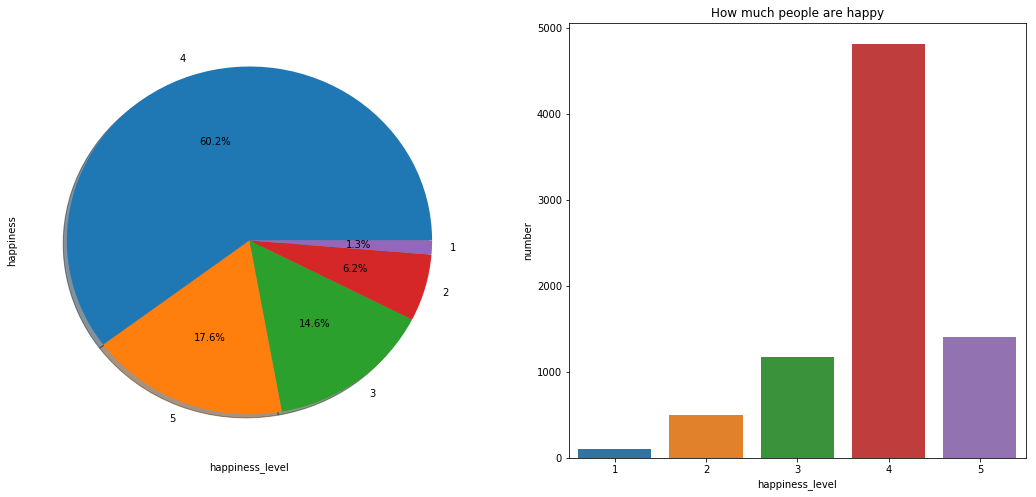

In [12]:
# 5个等级幸福感的柱状图，5个等级的占比图
f,ax=plt.subplots(1,2,figsize=(18,8))
train['happiness'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_xlabel('happiness_level')
# 用seaborn的计数图
sns.countplot('happiness',data=train,ax=ax[1])
# ax[1] = train['happiness'].value_counts().plot.bar()
ax[1].set_title('How much people are happy')
ax[1].set_xlabel('happiness_level')
ax[1].set_ylabel('number')
plt.show() 

In [13]:
## 分性别分析,1男，2女
train.groupby(['gender', 'happiness'])['happiness'].count()

gender  happiness
1       1              43
        2             216
        3             596
        4            2306
        5             599
2       1              61
        2             281
        3             575
        4            2512
        5             811
Name: happiness, dtype: int64

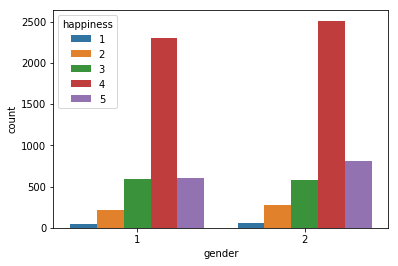

In [14]:
# hue为色彩色度的意思，可以理解为hue决定具有多彩的标签
sns.countplot(x='gender', hue='happiness', data=train)

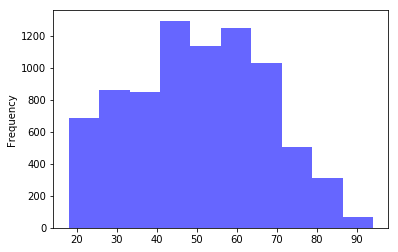

In [15]:
## 分年龄分析
# 绘制直方图，得到每个年龄段的频数
# bins: 直方图的柱数，可选项，默认为10
f,ax = plt.subplots(1,1)
train['age'].plot.hist(ax=ax, color='blue', alpha=0.6)

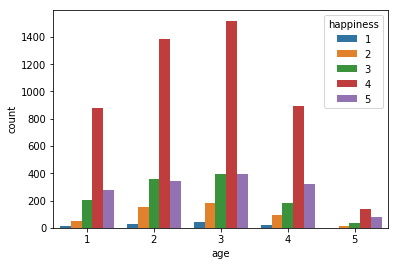

In [16]:
# 将年龄分阶段
## 按每个年龄阶段分析幸福感
# train.dtypes
combine=[train,test]
for dataset in combine:
    dataset.loc[dataset['age']<=16,'age']=0
    dataset.loc[(dataset['age'] > 16) & (dataset['age'] <= 32), 'age'] = 1
    dataset.loc[(dataset['age'] > 32) & (dataset['age'] <= 48), 'age'] = 2
    dataset.loc[(dataset['age'] > 48) & (dataset['age'] <= 64), 'age'] = 3
    dataset.loc[(dataset['age'] > 64) & (dataset['age'] <= 80), 'age'] = 4
    dataset.loc[ dataset['age'] > 80, 'age'] = 5 
sns.countplot('age',hue='happiness',data=train)
train['age'] = train['age'].astype(int)

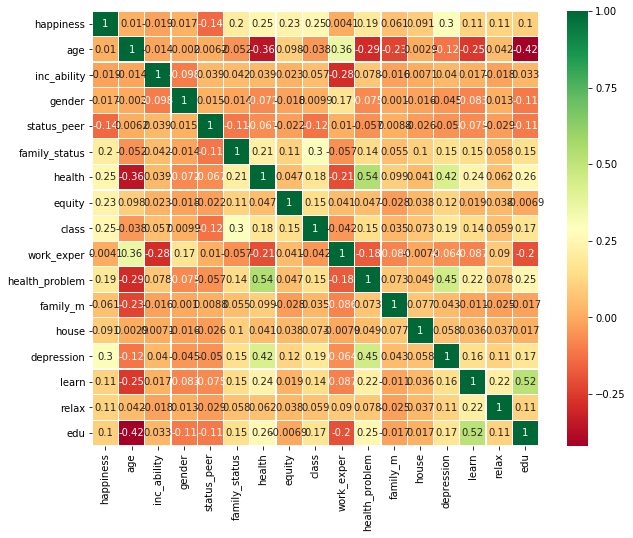

In [17]:
# 绘制热图，热图的用途
# data.corr()-->correlation matrix
sns.heatmap(train[['happiness','age','inc_ability','gender','status_peer','family_status','health','equity','class','work_exper',
                   'health_problem','family_m','house','depression','learn','relax','edu']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()
# cut_age.loc[cut_age['age'] <= 18,'age']='Juvenile'
# cut_age.loc[(cut_age['age'] > 18) & (cut_age['age'] <= 35), 'age'] = 'Youth'
# cut_age.loc[(cut_age['age'] > 35) & (cut_age['age'] <= 50), 'age'] = 'Middle_aged'
# cut_age.loc[(cut_age['age'] > 50) & (cut_age['age'] <= 65), 'age'] = 'Old_aged'
# cut_age.loc[(cut_age['age'] > 65), 'Age'] = 'elder_aged'
# sns.countplot('age', hue='happiness', data=cut_age)

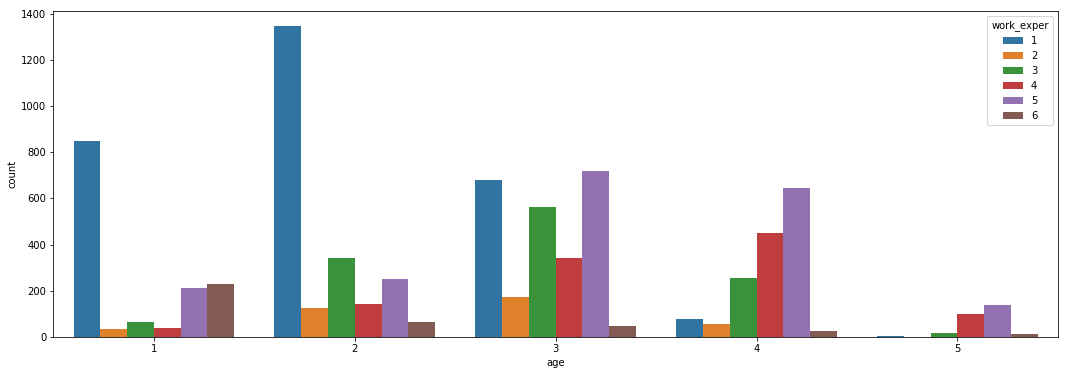

In [18]:
f,ax = plt.subplots(1,1,figsize=(18,6))
sns.countplot('age',hue='work_exper', data=train)